# Tarea 1- Problema 2. Clasificación con regresión logística. 

Para esta parte de la tarea, se utiliza un conjunto de datos de mediciones al corazón en pacientes con distintas categorías de arritmia cardiaca. El _dataset_ puede descargarse desde https://www.kaggle.com/shayanfazeli/heartbeat, utilizaremos en particular los archivos `mitbh_train.csv` y `mitbh_test.csv`. Nuestro objetivo principal será predecir a partir de las mediciones clasificar la arritmia del paciente. Sin embargo también exploraremos técnicas de reducción de dimensionalidad para tratar de preprocesar los datos, pues una rápida exploración de los datos nos muestra que tenemos 188 atributos.<br><br>


<img src="https://www.sociedadsadec.org.ar/wp-content/uploads/2017/09/arritmias-cardiacas-02.png" style="height:100%;" />
<br>
Las 5 categorías son: <br><br>
N: Normal beat<br>
S: Supraventricular premature beat<br>
V: Premature ventricular contraction<br>
F: Fusion of ventricular and normal beat<br>
Q: Unclassifiable beat

### 2.a Carga de datos
#### i) Cargue los datos, identifique la columna `target`. ¿Por qué es necesario pasar una lista de id al cargar los datos?
#### Respuesta:
* Se requiere tener identificados los targets e inputs para poder realizar las operaciones asociadas a cada uno, aplicar los algoritmos correspondientes y obtener los modelos de clasificación.

In [118]:
#Se Importan los paquetes a utilizar

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [119]:
# Carga de Datos 

data_train = pd.read_csv("mitbih_train.csv",names=[i for i in range(188)])
data_test = pd.read_csv("mitbih_test.csv",names=[i for i in range(188)])
data_train.rename(columns={187:"target"},inplace=True)
data_test.rename(columns={187:"target"},inplace=True)

In [120]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### ii) Explore los datos: ¿Están muy desbalanceadas las clases? ¿Qué tan dispares son las magnitudes de las mediciones? ¿Pareciera necesario estandarizar los datos antes de utilizarlos?

#### Respuesta:
* El valor medio de la columna target es de 0.47  aproximandamente además, el percentil 75 es 0 (cero), lo que indica que la mayoría de la data posee un target igual a cero, por lo que claramente están desbalanceadas las clases.

* Observando el promedio de los atributos, se aprecia que el orden de magnitud de estos varía considerablemente entre el mínimo y el máximo (diferencia máxima de 1000 aprox).

* Dado lo anterior, es necesario estandarizar los datos

In [7]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### 2.b Correlación
#### Calcule la matriz de correlación, note que esto está implementado en pandas. Represéntela de alguna forma que le parezca adecuada, por ejemplo como un _heatmap_. ¿Qué observa?, comente.

#### Respuesta:
* La matriz de correlación nos indica qué tanto se relacionan unas variables con otras, en el gráfico especificamente, se observa que las zonas amarillas son aquellas  donde existe una mayor correlación entre los atributos. De este forma, la tendendcia que se puede observar en la data es la existencia de una mayor correlación para los primeros 74 atributos aproximadamente. Además, existe un leve ensanchamiento de la franja diagonal, lo que nos da la idea que los atributos vecinos están levemente relacionados.

In [12]:
#Calculo matriz de correlación

Matriz_Corr=data_train.corr() 

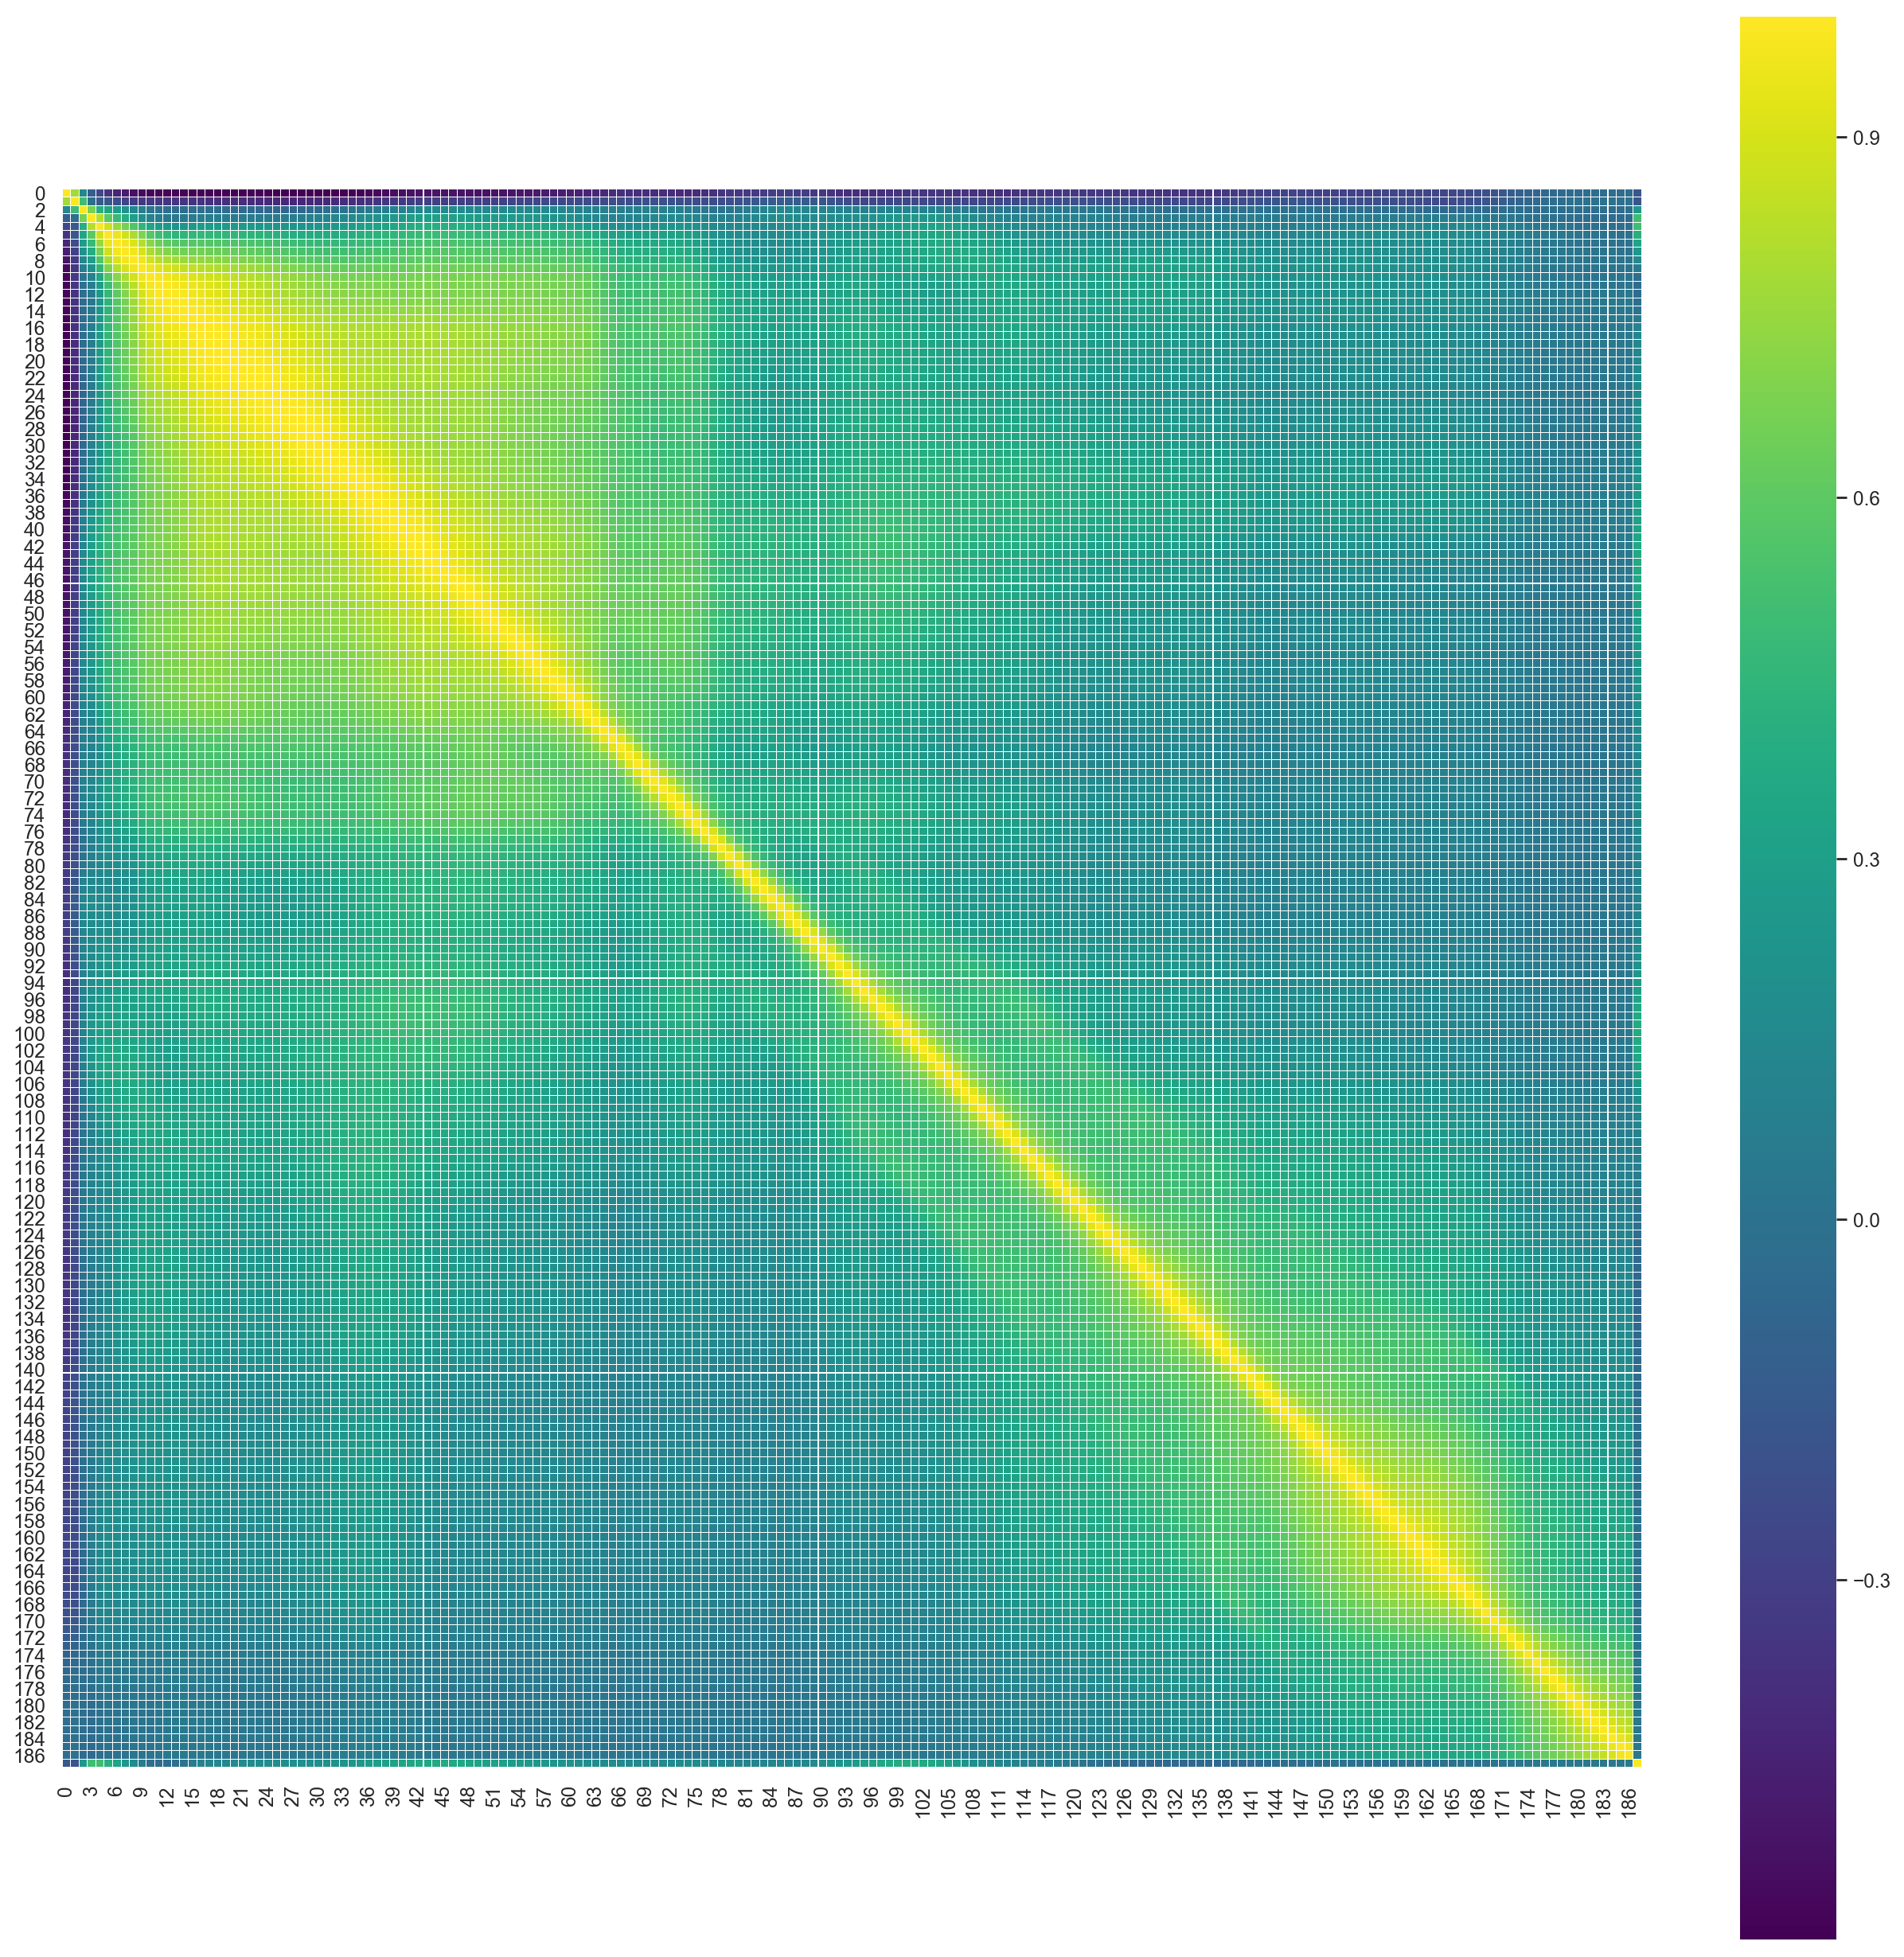

In [19]:
plt.figure(figsize=(20,20),dpi=160)
sns.heatmap(Matriz_Corr, vmax=1, linewidths=0.01,
            square=True,annot=False,cmap='viridis',cbar=True)

### 2.c Regresión Logistica

#### i) Separe el dataset proveniente de mitbih_train.csv en train y validation. Separe los datos utilizando train_test_split. ¿Qué habría ocurrido por la forma en que se cargaron los datos si utilizamos la opción shuffle = False?

#### Respuesta:
* La repartición de los datos no hubiera sido de manera aleatoria y la idea es que tanto el conjunto de entrenamiento como el conjunto de validación sean representativos de los datos que se tienen, lo que de cierta forma se logra si exista una distribución aleatoria de los datos entre los 2 conjuntos. El concepto de generalización no se va a estar cumpliendo del todo si existe una separción ordenada de los datos

In [122]:
xy_train,xy_val= train_test_split(data_train, test_size= 0.3,shuffle=True)
y_tr = xy_train['target']
x_tr = xy_train.drop(columns=['target'])
y_val = xy_val['target']
x_val = xy_val.drop(columns=['target'])

#### ii) Realice una primera regresión logística con los datos. ¿Qué fórmula utiliza el metodo `score`? (revise documentación)

#### Respuesta:
* La función score (X,y) mide la precisión y retorna el coeficiente de determinación R^2 de la predicción. El coeficiente R^2 es definida como $(1-u/v)$, donde $u=\sum (y_\text{True}-y_\text{Pred})^2$ y $v=\sum (y_\text{True}-y_\text{True mean})^2$. 
* Es importante mencionar que R^2 puede tomar el valor de 1, lo cual se puede interpretar como que el modelo es el adecuado, más aún, es el mejor, pero también puede ser negativo lo que implicaría que el modelo no es el correcto.

In [123]:
from sklearn.preprocessing import StandardScaler

## estandarización de los datos
escalar_x= StandardScaler()
x_tr_st=escalar_x.fit_transform(x_tr)
x_val_st = escalar_x.fit_transform(x_val)

In [124]:
#Defino el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [126]:
#Entreno el modelo
algoritmo.fit(x_tr_st,y_tr)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [135]:
#Predicción
y_pred=algoritmo.predict(x_val)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [132]:
y_val

42482    0.0
34382    0.0
13695    0.0
27517    0.0
27049    0.0
25351    0.0
6391     0.0
14225    0.0
26444    0.0
43063    0.0
80687    3.0
58667    0.0
57791    0.0
43567    0.0
51916    0.0
10320    0.0
29098    0.0
53274    0.0
12598    0.0
40742    0.0
20413    0.0
68991    0.0
21826    0.0
46213    0.0
8472     0.0
47980    0.0
59821    0.0
11862    0.0
32129    0.0
36961    0.0
        ... 
69839    0.0
50867    0.0
27316    0.0
78521    2.0
3983     0.0
66351    0.0
21544    0.0
73651    1.0
30319    0.0
12467    0.0
17789    0.0
57055    0.0
28712    0.0
41571    0.0
30888    0.0
59913    0.0
25453    0.0
41895    0.0
78083    2.0
22293    0.0
22932    0.0
12151    0.0
72206    0.0
17808    0.0
15417    0.0
78927    2.0
12999    0.0
5370     0.0
10860    0.0
4210     0.0
Name: target, Length: 26267, dtype: float64

In [142]:
#Calculo Score

score=algoritmo.score(x_val,y_val)
score

0.8264742833212777

#### iii) Evalúe con el score el conjunto de test. ¿Cuál es la utilidad del conjunto de validación y de test? Explique cuáles son sus usos.

* El conjunto de validación se utiliza para validar el modelo, preveniendo que exista un sobre o infra - ajuste, cumple una utilidad fundamental cuando requiero seleccionar un modelo.
* El conjunto de entrenamiento corresponde a la data utilizada para evaluar el modelo escogido, donde se reportan diversas medidas de métricas que buscan evaluar la eficacia del modelo.

In [144]:
# Divido el conjunto entrenamiento entre atributos y target
y_test = data_test['target']
x_test = data_test.drop(columns=['target'])

#Transformo los atributos x_test de acuerdo a la estandarización
x_test_st = escalar_x.fit_transform(x_test)

In [145]:
#Calculo score con respecto al conjunto de entrenamiento

score2=algoritmo.score(x_test_st,y_test)
score2

0.9075004567878677

#### iv) Calcule la matriz de confusión y comente respecto al valor dado por el `score`. Comente sobre la distinta información entregrada por la matriz de confusión y su interpretación. 

In [148]:
PredicRegLog=algoritmo.predict(x_test_st)
PredicRegLog

array([0., 0., 0., ..., 0., 4., 4.])

In [150]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, PredicRegLog)
print(confusion_matrix)

[[17855    21   214     4    24]
 [  408   119    29     0     0]
 [  932    13   470     5    28]
 [  126     0    10    26     0]
 [  195     2    14     0  1397]]


De acuerdo a la matriz de confusión se puede afirmar que:
* 17855 personas fueron clasificadas correctamente con la clase de arritmia asociada al 0
* 119 personas fueron clasificadas correctamente con la clase de arritmia asociada al 1
* 470 personas fueron clasificadas correctamente con la clase de arritmia asociada al 2
* 26 personas fueron clasificadas correctamente con la clase de arritmia asociada al 3
* 1397 personas fueron clasificadas correctamente con la clase de arritmia asociada al 4

A modo de ejemplificar, se muestra la información que entregan los valores fuera de la diagonal

* 932 personas fueron clasificados erronamiente como arritmia de clase 0, cuando en realidad eran de clase 2

In [151]:
#Calculo rapido para comparar
PredicRegLog[[1010]]

array([0.])

In [89]:
y_test[[1010]]

1010    0.0
Name: target, dtype: float64

### 2.d Otra métrica. 
Otra forma de comparar modelos podría ser con la siguiente métrica. Esta mide la cantidad de aciertos pero toma en cuenta algo más. ¿Que interpretación podría darle a la métrica en el código? 

#### Respuesta

* Esta métrica considera el error cometido en la predicción y lo multiplica por la probablidad de que el modelo se haya equivocado

#### Si un modelo entrega 0.5 y otro 0.4 en esta métrica, cual es mejor? 

* Debería ser el más pequeño, de acuerdo a lo dicho anteriormente


In [155]:
np.mean((np.max(algoritmo.predict_proba(x_val_st),axis=1)*(algoritmo.predict(x_val_st)-y_val))**2)

0.24847021230918911

### 2.e PCA y LDA
i) Transforme los datos mediante PCA a 2 dimensiones y grafique un subsampleo de alrededor de 50 - 100 datos con 20% de cada clase. Coloree cada punto correspondiente a la clase que pertenece. Grafique el centro de gravedad (promedio en cada cordenada) de cada una de las clases luego de la reducción de dimensionalidad. 

In [162]:
#Defino el algoritmo PCA y lo aplico al conjunto de entrenamiento

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xtr_pca = pca.fit_transform(x_tr)

In [164]:
print(xtr_pca)

[[-1.43854418 -0.06477   ]
 [-1.82226111  0.00836139]
 [-1.58567733  0.5890621 ]
 ...
 [ 0.24628148  1.90480794]
 [-0.53965021  0.179189  ]
 [-1.35230197  0.30820279]]


In [165]:
## dataframe auxiliar, construido a partir de las nuevas variables obtenidas con PCA

new_df_pca = pd.DataFrame({'Var1':xtr_pca[:,0],'Var2':xtr_pca[:,1],'Target':y_tr})
new_df_pca = new_df_pca.reset_index()
new_df_pca = new_df_pca.drop(columns='index')

In [166]:
new_df_pca.head()

,Target,Var1,Var2
0,0.0,-1.438544,-0.064770
1,0.0,-1.822261,0.008361
2,4.0,-1.585677,0.589062
3,4.0,3.553330,-0.723336
4,2.0,-0.048391,0.987089


In [169]:
#Se seleccionan 50 datos por cada clase

df0_pca = new_df_pca[new_df_pca['Target']==0.0]
df1_pca = new_df_pca[new_df_pca['Target']==1.0]
df2_pca = new_df_pca[new_df_pca['Target']==2.0]
df3_pca = new_df_pca[new_df_pca['Target']==3.0]
df4_pca = new_df_pca[new_df_pca['Target']==4.0]

sub_0 = pd.DataFrame.sample(df0_pca,n=50,replace=False)
sub_1 = pd.DataFrame.sample(df1_pca,n=50,replace=False)
sub_2 = pd.DataFrame.sample(df2_pca,n=50,replace=False)
sub_3 = pd.DataFrame.sample(df3_pca,n=50,replace=False)
sub_4 = pd.DataFrame.sample(df4_pca,n=50,replace=False)

sub_muestra = pd.concat([sub_0,sub_1,sub_2,sub_3,sub_4])


In [183]:

#Centros de Gravedad
x0_Center=np.sum(df0_pca['Var1'])/len(df0_pca['Var1'])
y0_Center=np.sum(df0_pca['Var2'])/len(df0_pca['Var2'])
x1_Center=np.sum(df1_pca['Var1'])/len(df1_pca['Var1'])
y1_Center=np.sum(df1_pca['Var2'])/len(df1_pca['Var2'])
x2_Center=np.sum(df2_pca['Var1'])/len(df2_pca['Var1'])
y2_Center=np.sum(df2_pca['Var2'])/len(df2_pca['Var2'])
x3_Center=np.sum(df3_pca['Var1'])/len(df3_pca['Var1'])
y3_Center=np.sum(df3_pca['Var2'])/len(df3_pca['Var2'])
x4_Center=np.sum(df4_pca['Var1'])/len(df4_pca['Var1'])
y4_Center=np.sum(df4_pca['Var2'])/len(df4_pca['Var2'])
print(x0_Center)
print(y0_Center)

-0.20354249525209908
0.0015355324677716272


Text(1.38002,0.00359383,' Cg4')

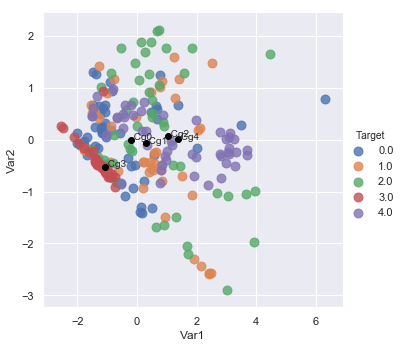

In [207]:
sns.lmplot(x='Var1',y='Var2',data=sub_muestra, fit_reg=False, hue='Target', legend=True, scatter_kws={"s":80})
plt.scatter(x0_Center,y0_Center,label='Centroide',color='black')
plt.scatter(x1_Center,y1_Center,label='Centroide',color='black')
plt.scatter(x2_Center,y2_Center,label='Centroide',color='black')
plt.scatter(x3_Center,y3_Center,label='Centroide',color='black')
plt.scatter(x4_Center,y4_Center,label='Centroide',color='black')
plt.text(x0_Center,y0_Center," Cg0",fontsize=10)
plt.text(x1_Center,y1_Center," Cg1",fontsize=10)
plt.text(x2_Center,y2_Center," Cg2",fontsize=10)
plt.text(x3_Center,y3_Center," Cg3",fontsize=10)
plt.text(x4_Center,y4_Center," Cg4",fontsize=10)

ii) Realice el mismo análisis para LDA, considerando el mismo conjunto de puntos.

In [186]:
from sklearn import discriminant_analysis 
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)

In [189]:
xtr_lda=lda.fit_transform(x_tr,y_tr)

In [190]:
## dataframe auxiliar
new_df_lda = pd.DataFrame({'Var1_lda':xtr_lda[:,0],'Var2_lda':xtr_lda[:,1],'Target':y_tr})
new_df_lda = new_df_lda.reset_index()
new_df_lda = new_df_lda.drop(columns='index')

In [110]:
new_df_lda.head()

,Target,Var1_lda,Var2_lda
0,0.0,-0.739363,-0.808192
1,0.0,-0.265667,0.869442
2,0.0,-0.173099,0.462997
3,2.0,1.685791,-3.987216
4,0.0,-1.736869,0.325315


In [111]:
df0_lda = new_df_lda[new_df_lda['Target']==0.0]
df1_lda = new_df_lda[new_df_lda['Target']==1.0]
df2_lda = new_df_lda[new_df_lda['Target']==2.0]
df3_lda = new_df_lda[new_df_lda['Target']==3.0]
df4_lda = new_df_lda[new_df_lda['Target']==4.0]

sub_0_lda = pd.DataFrame.sample(df0_lda,n=50,replace=False)
sub_1_lda = pd.DataFrame.sample(df1_lda,n=50,replace=False)
sub_2_lda = pd.DataFrame.sample(df2_lda,n=50,replace=False)
sub_3_lda = pd.DataFrame.sample(df3_lda,n=50,replace=False)
sub_4_lda = pd.DataFrame.sample(df4_lda,n=50,replace=False)

sub_muestra_lda = pd.concat([sub_0_lda,sub_1_lda,sub_2_lda,sub_3_lda,sub_4_lda])

In [193]:
#Centros de Gravedad
x0_Center_lda=np.sum(df0_lda['Var1_lda'])/len(df0_lda['Var1_lda'])
y0_Center_lda=np.sum(df0_lda['Var2_lda'])/len(df0_lda['Var2_lda'])
x1_Center_lda=np.sum(df1_lda['Var1_lda'])/len(df1_lda['Var1_lda'])
y1_Center_lda=np.sum(df1_lda['Var2_lda'])/len(df1_lda['Var2_lda'])
x2_Center_lda=np.sum(df2_lda['Var1_lda'])/len(df2_lda['Var1_lda'])
y2_Center_lda=np.sum(df2_lda['Var2_lda'])/len(df2_lda['Var2_lda'])
x3_Center_lda=np.sum(df3_lda['Var1_lda'])/len(df3_lda['Var1_lda'])
y3_Center_lda=np.sum(df3_lda['Var2_lda'])/len(df3_lda['Var2_lda'])
x4_Center_lda=np.sum(df4_lda['Var1_lda'])/len(df4_lda['Var1_lda'])
y4_Center_lda=np.sum(df4_lda['Var2_lda'])/len(df4_lda['Var2_lda'])

In [194]:
sub_muestra_lda.head()

,Target,Var1_lda,Var2_lda
13836,0.0,-1.534926,0.911027
25512,0.0,-2.616158,0.464557
60066,0.0,-0.750590,0.383879
28393,0.0,-0.877590,-1.211984
19654,0.0,0.594303,-1.429129


Text(5.15355,0.294858,'Cg4')

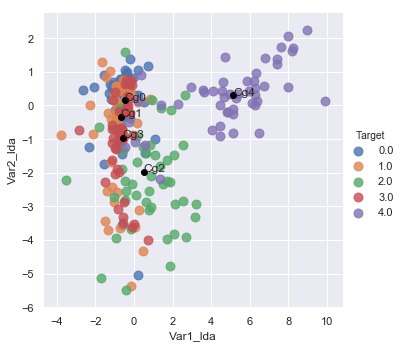

In [209]:

sns.lmplot(x='Var1_lda',y='Var2_lda',data=sub_muestra_lda, fit_reg=False, hue='Target', legend=True, scatter_kws={"s":80})
plt.scatter(x0_Center_lda,y0_Center_lda,label='Centroide',color='black')
plt.scatter(x1_Center_lda,y1_Center_lda,label='Centroide',color='black')
plt.scatter(x2_Center_lda,y2_Center_lda,label='Centroide',color='black')
plt.scatter(x3_Center_lda,y3_Center_lda,label='Centroide',color='black')
plt.scatter(x4_Center_lda,y4_Center_lda,label='Centroide',color='black')
plt.text(x0_Center_lda,y0_Center_lda,"Cg0",fontsize=12)
plt.text(x1_Center_lda,y1_Center_lda,"Cg1",fontsize=12)
plt.text(x2_Center_lda,y2_Center_lda,"Cg2",fontsize=12)
plt.text(x3_Center_lda,y3_Center_lda,"Cg3",fontsize=12)
plt.text(x4_Center_lda,y4_Center_lda,"Cg4",fontsize=12)

### 2.f Más reducción de dimensionalidad
Entrene un modelo de regresión logística para el método que le pareció más apropiado de la pregunta anterior, haciendo variar el número de componentes de 2 a 120. Calcule para cada modelo alguna métrica de la calidad del modelo tanto sobre el conjunto de entrenamiento como sobre el conjunto de validación. 

Grafique cómo varían ambos errores en función de la dimensionalidad sobre la que se trabaja. 

In [228]:
## Número de Componentes
componentes = np.arange(2,121)
print(componentes)

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120]


In [229]:
## Creación de 120-1 modelos de PCA con de 2 hasta 120 dimensiones
Xf_pca = []
Xf_val=[]
Xf_test=[]
for i in componentes:
    pca = PCA(n_components=i)
    Xf_tr_pca = pca.fit_transform(x_tr)
    Xf_val_i=pca.transform(x_val)
    Xf_test_i=pca.transform(x_test)
    Xf_pca.append(Xf_tr_pca)
    Xf_val.append(Xf_val_i)
    Xf_test.append(Xf_test_i)


In [224]:
Xf_pca[0]

array([[-1.43854418, -0.06477004],
       [-1.82226111,  0.00836144],
       [-1.58567733,  0.5890623 ],
       ...,
       [ 0.24628148,  1.90480763],
       [-0.53965021,  0.1791891 ],
       [-1.35230197,  0.30820267]])

In [230]:
## Ajuste de una regresión logística para cada uno de los modelos 
metrica_val = []
metrica_test = []

count=0
for data in Xf_pca:
    clasificador = LogisticRegression(solver='lbfgs').fit(data,y_tr)
    
    prediccion_val = clasificador.predict(Xf_val[count])
    prediccion_test = clasificador.predict(Xf_test[count])
    
    accuracy_val = metrics.accuracy_score(y_val,prediccion_val)
    accuracy_test = metrics.accuracy_score(y_test,prediccion_test)
    
    metrica_val.append(accuracy_val)
    metrica_test.append(accuracy_test)
    count=count+1

In [231]:
metrica_val

[0.817337343434728,
 0.8315376708417406,
 0.8475273156432025,
 0.8544942323066966,
 0.8585297140899227,
 0.859405337495717,
 0.8696082537023642,
 0.8745574294742452,
 0.874481288308524,
 0.8801918757376176,
 0.8803060874861994,
 0.8804202992347813,
 0.88095328739483,
 0.8816385578863213,
 0.8835801576122131,
 0.8805725815662238,
 0.8816385578863213,
 0.8814101343891575,
 0.8824380401263944,
 0.8826283930406974,
 0.882971028286443,
 0.8841131457722617,
 0.884189286937983,
 0.8850649103437773,
 0.8848364868466136,
 0.8870826512353904,
 0.8876156393954392,
 0.8903947919442646,
 0.8900902272813797,
 0.8888719686298397,
 0.8916891917615258,
 0.893097803327369,
 0.8932120150759508,
 0.8932500856588115,
 0.8946206266417939,
 0.8946206266417939,
 0.8961434499562189,
 0.8971713556934556,
 0.8974378497734801,
 0.8974378497734801,
 0.8974759203563406,
 0.8977043438535044,
 0.8977804850192257,
 0.8975139909392013,
 0.8975901321049226,
 0.8973997791906194,
 0.89865610842502,
 0.8985418966764381,
 0

In [232]:
metrica_test

[0.8196144710396492,
 0.833729216152019,
 0.8498538278823314,
 0.8569797186186735,
 0.8609080942810159,
 0.8617303124429015,
 0.8692673122601864,
 0.8733784030696145,
 0.8745203727389,
 0.879590718070528,
 0.8795450392837566,
 0.8796363968572994,
 0.8803215786588708,
 0.8810524392472135,
 0.882285766490042,
 0.8805042938059565,
 0.8809610816736707,
 0.8817832998355564,
 0.8824684816371278,
 0.8837474876667276,
 0.8846153846153846,
 0.8845697058286132,
 0.884661063402156,
 0.8844326694682989,
 0.8844326694682989,
 0.8861227845788416,
 0.8863511785126987,
 0.889411657226384,
 0.8884067239174127,
 0.8878585784761557,
 0.8901881966014983,
 0.8916955965649552,
 0.8920153480723552,
 0.8918326329252695,
 0.8931116389548693,
 0.8935684268225836,
 0.8954412570802119,
 0.8960350813082405,
 0.8964918691759547,
 0.8964005116024119,
 0.8962177964553262,
 0.8960807600950119,
 0.8961721176685548,
 0.8957610085876119,
 0.8960350813082405,
 0.895669651014069,
 0.896309154028869,
 0.8958066873743833,
 0

In [234]:
maximo_val = max(metrica_val)
indice = metrica_val.index(maximo_val)
componente_optimo1 = componentes[indice]
componente_optimo1

112

In [236]:
maximo_test = max(metrica_test)
indice = metrica_test.index(maximo_test)
componente_optimo2 = componentes[indice]
componente_optimo2

119

Text(0.5,0,'Numero de componentes')

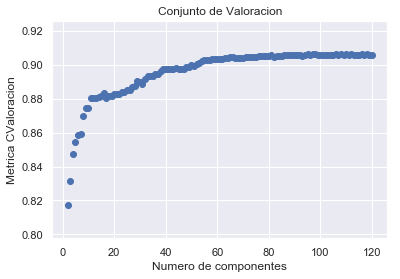

In [265]:
plt.scatter(x=componentes,y=metrica_val)
plt.title('Conjunto de Valoracion')
plt.ylabel('Metrica CValoracion')
plt.xlabel('Numero de componentes')

Text(0.5,0,'Numero de componentes')

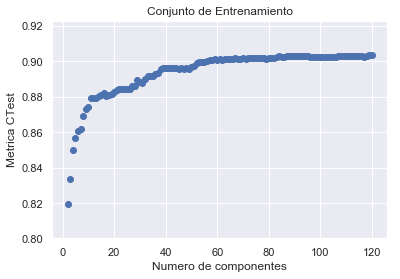

In [266]:
plt.scatter(x=componentes,y=metrica_test)
plt.title('Conjunto de Entrenamiento')
plt.ylabel('Metrica CTest')
plt.xlabel('Numero de componentes')

#### Comentario
* En los gráficos se puede observar el comportamiento de la métrica escogida (exactitud) del modelo al ir variando el número de componentes, el cual tiene un comportamiento asintotico. Si el objetivo es optimizar y mejorar los tiempos de cómputo, la mejor elección sería quedarse con 60 componentes aproximadamente, ya que con un mayor número de componentes no es tanta la ganancia en exactitud que se está logrando.

#### 2.g Naive Bayes
"Entrene" un modelo utilizando Naive Bayes y comparelo con el modelo logístico que entrenó anteriormente. Le parece adecuado el nombre _Naive_?

In [268]:
from sklearn import naive_bayes as sknb
NB = sknb.BernoulliNB()
NB.fit(x_tr_st,y_tr)
y_predict_nb=NB.predict(x_test)
accuracy_val = metrics.accuracy_score(y_test,y_predict_nb)

In [269]:
accuracy_val

0.11606979718618674

In [270]:
confusion_matrix_nb = metrics.confusion_matrix(y_test,y_predict_nb)
print(confusion_matrix_nb)

[[ 461 4345 3709    3 9600]
 [  61   74  166    0  255]
 [  93  280  437    1  637]
 [   7  149    1    0    5]
 [  13   21    5    0 1569]]


#### Comentario: 
* Claramente se obtiene una exactitud bastante menor que el modelo logístico, y esto puede ser debido a que el modelo Naive Bayes depende mucho de los datos, entonces su capacidad predicctiva puede verse fuertemente alterada por la ocurrencia de sobre ajuste o la presencia de outliers. Por lo tanto, el nombre Ingenuo Bayes parece adecuado para el modelo.